In [178]:
import numpy as np
import matplotlib.pyplot as plt

$\Huge \textbf{Paramètres globaux}$
---------------------------------------------------------------------------


In [179]:
NB_ELEVES = 100            # Nombre d'étudiants
DUREE_MOOC = 10            # Durée du contenu vidéo (heures)
DUREE_VISIONNAGE = 10      # en heures 
MIX_ELEC_FR = 0.0519       # kgCO2e/kWh

$\Huge \textbf{Paramètres pour les terminaux}$
----------------------------------------------------

In [180]:
NB_SMARTPHONE = 40       # 40 des 100
NB_LAPTOP = 40           # 40 des 100
NB_PC_FIXE = 20          # 20 des 100

$\Huge \textbf{Structures des terminaux}$

* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie du terminal.
* $\textbf{usage\_moyen}$ : représente l'usage moyen du terminal en $\text{kWh}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).






In [181]:
smarphone = {'duree_vie': 3, 'duree_utilisation': 3, 'heures_tot': 3*365*3,'usage_moyen': 3.9 ,'gwp':79.5, 'adpe':0.00283,
            'adpf': 813}

laptop = {'duree_vie': 5, 'duree_utilisation': 6, 'heures_tot': 5*365*6,'usage_moyen': 29.1 , 'gwp':185,'adpe':0.00951,
         'adpf': 2480}

pc_fixe = {'duree_vie': 5, 'duree_utilisation': 3, 'heures_tot': 5*365*3,'usage_moyen': 100, 'gwp':268,'adpe':0.022,
          'adpf': 4790}

ecran = {'duree_vie': 5, 'duree_utilisation': 3, 'heures_tot': 5*365*3,'usage_moyen': 70 , 'gwp':69.8, 'adpe':0.0117,
        'adpf': 1350}

$\Huge \textbf{Calcul impact des terminaux (hors usage) (unité : kg CO2 eq)}$ 

In [182]:
def impact_terminal(appareil):
    return appareil['gwp']*(DUREE_VISIONNAGE/appareil['heures_tot'])

In [183]:
impact_agrege_sm = impact_terminal(smarphone)
impact_agrege_pc = impact_terminal(pc_fixe) + impact_terminal(ecran)
impact_agrege_op = impact_terminal(laptop)
impact_agrege_tot = NB_PC_FIXE*impact_agrege_pc + NB_LAPTOP*impact_agrege_op + NB_SMARTPHONE*impact_agrege_sm
print(f"L'impact total des terminaux hors usage est {impact_agrege_tot:.2f} kg CO₂ eq")

L'impact total des terminaux hors usage est 28.78 kg CO₂ eq


$\Huge \textbf{Calcul impact de l'usage des terminaux (unité : kg CO2 eq)}$

$$
\text{Impact}_{\text{Usage}} = \underbrace{\left( \frac{\text{Usage Annuel Moyen ADEME (kWh)}}{\text{Nbre Jours} \times \text{Usage Quotidien (h)}} \right)}_{\text{Puissance Moyenne (kW)}} \times \underbrace{\text{10 h}}_{\text{Durée MOOC}} \times \underbrace{0,052}_{\text{Mix France}}
$$

In [184]:
def impact_usage_terminal(appareil):
    return (appareil['usage_moyen']/(365*appareil['duree_utilisation']))*DUREE_MOOC*MIX_ELEC_FR

In [185]:
impact_usage_sm = impact_usage_terminal(smarphone)
impact_usage_op = impact_usage_terminal(laptop)
impact_usage_pc = impact_usage_terminal(pc_fixe) + impact_usage_terminal(ecran)
impact_usage_tot = NB_PC_FIXE*impact_usage_pc + NB_LAPTOP*impact_usage_op + NB_SMARTPHONE*impact_usage_sm
print(f"L'impact total de l'usage des terminaux est {impact_usage_tot:.2f} kg CO₂ eq")

L'impact total de l'usage des terminaux est 1.96 kg CO₂ eq


$\Huge \textbf{Calcul impact total des terminaux (unité : kg CO2 eq)}$

In [186]:
impact_tot_ter = impact_usage_tot + impact_agrege_tot
print(f"L'impact total de l'usage des terminaux est {impact_tot_ter:.2f} kg CO₂ eq")

L'impact total de l'usage des terminaux est 30.74 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique des terminaux (unité : kg Sb eq)}$

In [187]:
def impact_abio(appareil):
    return appareil['adpe']*(DUREE_VISIONNAGE/appareil['heures_tot'])

In [188]:
impact_abio_sm = impact_abio(smarphone)
impact_abio_pc = impact_abio(pc_fixe) + impact_abio(ecran)
impact_abio_op = impact_abio(laptop)
impact_abio_tot = NB_PC_FIXE*impact_abio_pc + NB_LAPTOP*impact_abio_op + NB_SMARTPHONE*impact_abio_sm
print(f"L'épuisement abiotique des terminaux est  {impact_abio_tot:.4f} kg Sb eq")

L'épuisement abiotique des terminaux est  0.0019 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des terminaux (unité : MJ)}$

$\text{Il faut aussi convertir l'énergie consommée pour l'usage des terminaux en énergie primaire pour avoir la totalité de l'impact}$

$$
\text{Conversion}_{\text{énergie consommée}} = \underbrace{\left( \frac{\text{Usage Annuel Moyen ADEME (kWh)}}{\text{Nbre Jours} \times \text{Usage Quotidien (h)}} \right)}_{\text{Puissance Moyenne (kW)}} \times \underbrace{\text{10 h}}_{\text{Durée MOOC}} \times \underbrace{2,3}_{\text{coef d'énergie primaire}} \times \underbrace{\text{3,6}}_{\text{1kWh=3,6MJ}}
$$

In [189]:
COEF_EP = 2.3   # kWh - pour 1 kWh d'électricité en énergie finale, 2,3 kWh d'énergie primaire auront été consommés en moyenne
def impact_ep(appareil):
    return appareil['adpf']*(DUREE_VISIONNAGE/appareil['heures_tot'])
def conversion_eCons_en_ePrim(appareil):
    return (appareil['usage_moyen']/(365*appareil['duree_utilisation']))*DUREE_MOOC*COEF_EP*3.6

In [190]:
# La conversion
ep_usage_sm = conversion_eCons_en_ePrim(smarphone)
ep_usage_pc = conversion_eCons_en_ePrim(pc_fixe) + conversion_eCons_en_ePrim(ecran)
ep_usage_op = conversion_eCons_en_ePrim(laptop)
ep_usage_tot = NB_PC_FIXE*ep_usage_pc + NB_LAPTOP*ep_usage_op + NB_SMARTPHONE*ep_usage_sm

In [191]:
impact_ep_sm = impact_ep(smarphone)
impact_ep_pc = impact_ep(pc_fixe) + impact_ep(ecran)
impact_ep_op = impact_ep(laptop)
impact_ep_tot = NB_PC_FIXE*impact_ep_pc + NB_LAPTOP*impact_ep_op + NB_SMARTPHONE*impact_ep_sm + ep_usage_tot
print(f"La consommation de l'énergie primaire des terminaux est  {impact_ep_tot:.2f} MJ")

La consommation de l'énergie primaire des terminaux est  726.78 MJ


$\Huge \textbf{Bilan de l'imapct des termianux pour le MOOC}$


In [192]:
print(f"L'impact total de changement climatique des terminaux est {impact_tot_ter:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des terminaux est  {impact_abio_tot:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des terminaux est  {impact_ep_tot:.2f} MJ")

L'impact total de changement climatique des terminaux est 30.74 kg CO₂ eq
L'épuisement abiotique des terminaux est  0.0019 kg Sb eq
La consommation de l'énergie primaire des terminaux est  726.78 MJ


$\Huge \textbf{Calculs impacts réseau}$
----------------------------------------------------

In [193]:
CONSO_DONNEES = 1.5                                     # 1.5 Go/h d'après notre hypothèse
VOL_DONNEES_PAR_ELEVE = CONSO_DONNEES*DUREE_VISIONNAGE  # 15 Go par élève

In [194]:
VOL_DONNES_RESEAU_FIXE = VOL_DONNEES_PAR_ELEVE*(NB_LAPTOP+NB_PC_FIXE)     # 900 Go de traffic par Wi-Fi (60*15)
VOL_DONNES_RESEAU_MOBILE = VOL_DONNEES_PAR_ELEVE*NB_SMARTPHONE            # 600 Go de traffic par 3G/4G/5G (40*15)
TOTAL_TRAFFIC_DONNES = VOL_DONNES_RESEAU_MOBILE + VOL_DONNES_RESEAU_FIXE  # 1500 Go de taffic total

$\Huge \textbf{Structures des réseaux}$
* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie .
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).

In [195]:
fixe = {'gwp':1.24e-03, 'adpe': 1.84e-07, 'adpf': 1.01e-01}

mobile = {'gwp':1.31e-02, 'adpe': 8.15e-07, 'adpf': 1.43}

$\Huge \textbf{Calcul changement clmatique total des réseaux (unité : kg CO2 eq)}$

In [196]:
impact_res_cc_tot = VOL_DONNES_RESEAU_FIXE*fixe['gwp'] + VOL_DONNES_RESEAU_MOBILE*mobile['gwp']
print(f"L'impact du changement climatique total des réseaux est {impact_res_cc_tot:.2f} kg CO₂ eq")

L'impact du changement climatique total des réseaux est 8.98 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique des réseaux (unité : kg Sb eq)}$

In [197]:
impact_res_abio_tot = VOL_DONNES_RESEAU_FIXE*fixe['adpe'] + VOL_DONNES_RESEAU_MOBILE*mobile['adpe']
print(f"L'épuisement abiotique des réseaux est  {impact_res_abio_tot:.4f} kg Sb eq")

L'épuisement abiotique des réseaux est  0.0007 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des réseaux (unité : MJ)}$

In [198]:
impact_res_ep_tot = VOL_DONNES_RESEAU_FIXE*fixe['adpf'] + VOL_DONNES_RESEAU_MOBILE*mobile['adpf']
print(f"La cosommation de l'énergie primaire des réseaux est  {impact_res_ep_tot:.2f} MJ")

La cosommation de l'énergie primaire des réseaux est  948.90 MJ


$\Huge \textbf{Bilan de l'imapct des réseaux pour le MOOC}$

In [199]:
print(f"L'impact du changement climatique total des réseaux est {impact_res_cc_tot:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des réseaux est  {impact_res_abio_tot:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des réseaux est  {impact_res_ep_tot:.1f} MJ")

L'impact du changement climatique total des réseaux est 8.98 kg CO₂ eq
L'épuisement abiotique des réseaux est  0.0007 kg Sb eq
La consommation de l'énergie primaire des réseaux est  948.9 MJ


$\Huge \textbf{Calculs impacts serveur}$
----------------------------------------------------

In [200]:
USAGE_MOOC_DU_SERVEUR = 0.05
CONS_SERVEUR_ANNUEL = 1805       #kWh par an 
PUE = 1.6                        #1,6 pour le refroidissement et l'infrastructure

$\Huge \textbf{Structures du serveur}$

* $\textbf{duree\_utilisation}$ : est la durée de vie du serveur (donnée de la base de ADEME).
* $\textbf{gwp}$ : est en $\text{kg CO}_2\text{ eq}$ et représente l'impact de la fabrication, la distribution et la fin de vie .
* $\textbf{adpe}$ : correspond à l'épuisement des ressources abiotiques en $\text{kg Sb eq}$ (donnée dans la base de données de l'ADEME).
* $\textbf{adpf}$ : correspond à la consommation de l'énergie primaire en $\text{MJ}$ (donnée dans la base de données de l'ADEME).

In [201]:
serveur = {'duree_utilisation': 5, 'gwp':7.66e+02, 'adpe': 1.86e-02, 'adpf': 1.18e+04}

$\Huge \textbf{Calcul impact du serveur (hors usage) (unité : kg CO2 eq)}$ 

In [202]:
impact_agrege_serveur = (serveur['gwp']/serveur['duree_utilisation'])

$\Huge \textbf{Calcul de l'usage du serveur(unité : kg CO2 eq)}$ 

In [203]:
cons_reel_du_serv = CONS_SERVEUR_ANNUEL*PUE
impact_usage_annuel = cons_reel_du_serv * MIX_ELEC_FR

In [204]:
cc_serveur_mooc = (impact_agrege_serveur + impact_usage_annuel) * USAGE_MOOC_DU_SERVEUR
print(f"L'impact du changement climatique total du serveur est {cc_serveur_mooc:.2f} kg CO₂ eq")

L'impact du changement climatique total du serveur est 15.15 kg CO₂ eq


$\Huge \textbf{Calcul de l'épuisement abiotique du serveur (unité : kg Sb eq)}$

In [205]:
impact_abio_serv = (serveur['adpe']/serveur['duree_utilisation'])*USAGE_MOOC_DU_SERVEUR
print(f"L'épuisement abiotique du serveur est  {impact_abio_serv:.4f} kg Sb eq")

L'épuisement abiotique du serveur est  0.0002 kg Sb eq


$\Huge \textbf{Calcul de la consommation de l'énergie primaire des réseaux (unité : MJ)}$

Le calcul de la consomation de l'énergie primaire est fait en deux étape comme suit:$$
EP_{\text{serveur}} = \underbrace{EP_{\text{matériel}}}_{\text{Fabrication amortie}} + \underbrace{EP_{\text{usage}}}_{\text{Consommation électrique}}
$$ 
où
$$
EP_{\text{matériel}} = \left( \frac{\text{ADPf}_{\text{total}}}{\text{Durée de vie}_{\text{ans}}} \right) \times \text{Allocation}_{\text{MOOC}}
$$
et 
$$
EP_{\text{usage}} = \underbrace{E_{\text{elec, finale}}}_{\text{(kWh)}} \times \underbrace{2,3}_{\text{Coeff. EP}} \times \underbrace{3,6}_{\text{Conv. MJ}}
$$

In [206]:
impact_ep_serv = (serveur['adpf']/serveur['duree_utilisation'])*USAGE_MOOC_DU_SERVEUR
impact_ep_serv = impact_ep_serv + impact_usage_annuel*2.3*3.6
print(f"La consommation de l'énergie primaire du serveur est  {impact_ep_serv:.1f} MJ")

La consommation de l'énergie primaire du serveur est  1359.1 MJ


$\Huge \textbf{Bilan de l'imapct du serveur pour le MOOC}$

In [207]:
print(f"L'impact du changement climatique total du serveur est {cc_serveur_mooc:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique des réseaux est  {impact_abio_serv:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire des réseaux est  {impact_ep_serv:.1f} MJ")

L'impact du changement climatique total du serveur est 15.15 kg CO₂ eq
L'épuisement abiotique des réseaux est  0.0002 kg Sb eq
La consommation de l'énergie primaire des réseaux est  1359.1 MJ


$\Huge \textbf{Calcul de l'impact total}$
----------------------------------------------------

In [208]:
imapct_tot_cc = cc_serveur_mooc + impact_res_cc_tot + impact_tot_ter
impact_tot_abio = impact_abio_serv + impact_res_abio_tot + impact_abio_tot
impact_tot_ep = impact_ep_serv + impact_res_ep_tot + impact_ep_tot

In [209]:
print(f"L'impact du changement climatique total  est {imapct_tot_cc:.2f} kg CO₂ eq")
print(f"L'épuisement abiotique total est  {impact_tot_abio:.4f} kg Sb eq")
print(f"La consommation de l'énergie primaire totale est  {impact_tot_ep:.1f} MJ")

L'impact du changement climatique total  est 54.87 kg CO₂ eq
L'épuisement abiotique total est  0.0028 kg Sb eq
La consommation de l'énergie primaire totale est  3034.7 MJ


$\Huge \textbf{Representations graphiques}$
----------------------------------------------------

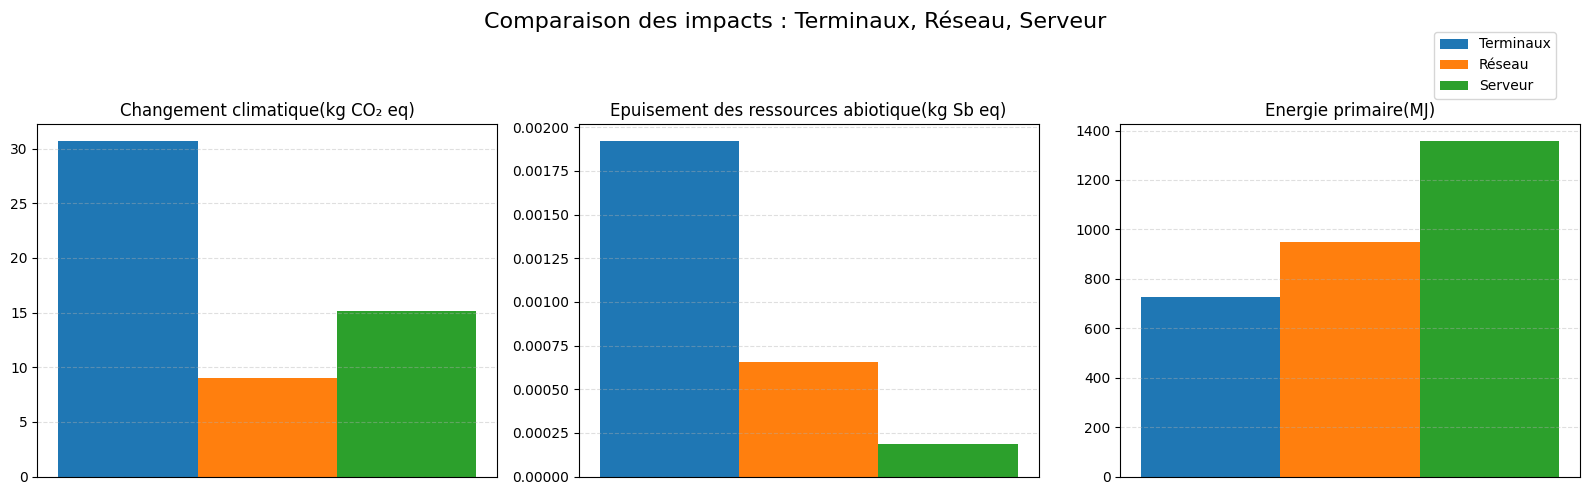

In [239]:
categories = ["Changement climatique(kg CO₂ eq)", 
              "Epuisement des ressources abiotique(kg Sb eq)", 
              "Energie primaire(MJ)"]

terminaux = [impact_tot_ter, impact_abio_tot, impact_ep_tot]
reseau    = [impact_res_cc_tot, impact_res_abio_tot, impact_res_ep_tot]
serveur   = [cc_serveur_mooc, impact_abio_serv, impact_ep_serv]

x = np.arange(1)
largeur = 0.25

# Couleurs fixes
couleur_terminaux = "tab:blue"
couleur_reseau = "tab:orange"
couleur_serveur = "tab:green"

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, ax in enumerate(axes):
    ax.bar(x - largeur, terminaux[i], width=largeur, color=couleur_terminaux)
    ax.bar(x,           reseau[i],    width=largeur, color=couleur_reseau)
    ax.bar(x + largeur, serveur[i],   width=largeur, color=couleur_serveur)
    
    ax.set_title(categories[i], fontsize=12)
    ax.set_xticks([])
    ax.grid(axis="y", linestyle="--", alpha=0.4)

fig.suptitle("Comparaison des impacts : Terminaux, Réseau, Serveur", fontsize=16)

fig.legend(["Terminaux", "Réseau", "Serveur"],
           loc="upper right", bbox_to_anchor=(0.98, 0.95))

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()


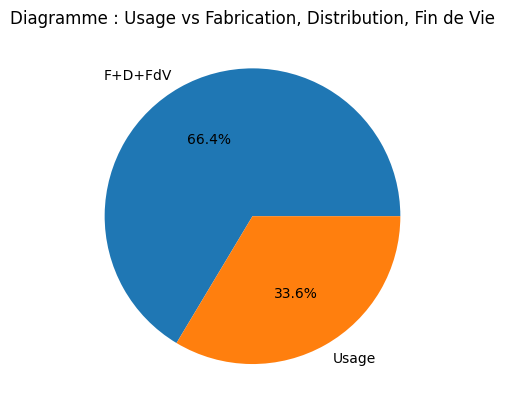

In [250]:
impact_fab = impact_agrege_tot + impact_agrege_serveur* USAGE_MOOC_DU_SERVEUR
impact_usage = impact_usage_tot+ impact_usage_annuel*USAGE_MOOC_DU_SERVEUR + impact_res_cc_tot
impact_usage, impact_fab

labels = ['F+D+FdV', 'Usage']
values = [impact_fab, impact_usage]

plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title("Diagramme : Usage vs Fabrication, Distribution, Fin de Vie")
plt.show()
